# **Installation of Bangla-nltk and Bangla lemmatizer**
*   BanglaNLTK is a Python library designed for natural language processing (NLP) tasks specifically for the Bengali language.
*   Lemmatizer library is used to reduce words to their base or root form.

In [ ]:
! pip install banglanltk
! pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-31w40636/banglakit-lemmatizer_77df48560ce049d787a870f11999cb94
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-31w40636/banglakit-lemmatizer_77df48560ce049d787a870f11999cb94
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a46069888acffe8870
  Preparing metadata (setup.py) ... done


# **Importing necessary libraries**
*  **Pandas:** Manipulate and analyze data tables.
*  **NumPy:** Work with large arrays and perform mathematical operations.
*  **re (regular expressions):** Search and manipulate strings based on patterns.
*  **Matplotlib:** Create visualizations such as plots and charts.

In [ ]:
import banglanltk as bn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# **Mount from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the E-commerce dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/E_commerce.xlsx')

# **Shape of the dataset**

In [ ]:
df.shape

(1000, 3)

# **Calculate the percentage of each classes and plot them**

Number of classes: 4
Percentage of class 'Very Positive': 28.50%
Percentage of class 'Very Negative': 24.90%
Percentage of class 'Negative': 23.80%
Percentage of class 'Positive': 22.80%



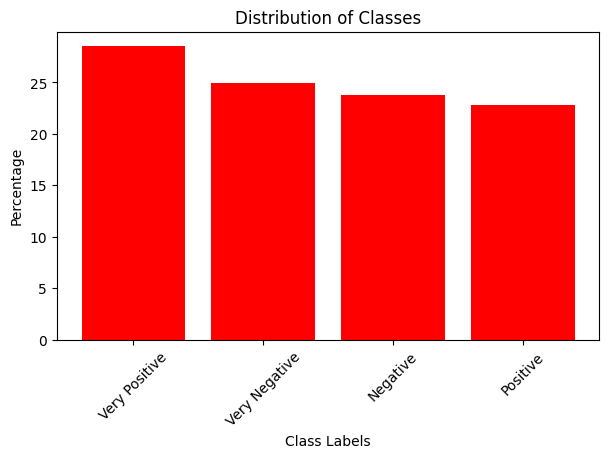

In [ ]:
# Calculate the total number of entries
total_entries = len(df)

# Get the number of distinct classes in the 'Comment_Type' column
distinct_classes = df['Comment_Type'].nunique()

# Print the result
print(f"Number of classes: {distinct_classes}")

# Get the count of each distinct class in the 'Comment_Type' column
class_counts = df['Comment_Type'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / total_entries) * 100

# Print the results
for label, percentage in class_percentages.items():
    print(f"Percentage of class '{label}': {percentage:.2f}%")

print()

# Plot the histogram
plt.figure(figsize=(7,4))
plt.bar(class_percentages.index, class_percentages, color='red')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary

plt.show()

In [ ]:
df.head(5)

,Comment,Product_Type,Comment_Type
0,খুবই আরাম দায়ক এবং শীতের জন্য ঘরে পরার পারফেক্...,Fashion,Positive
1,স্লিপার গুলা দাম হিসেবে অনেক ভালো। ধন্যবাদ সেল...,Fashion,Very Positive
2,প্রাইজ হিসেবে মান ঠিক আছে। রেগুলার ইউজ করার সু...,Fashion,Positive
3,দাম অনুসারে ভালোই । আমি ১১০ টাকা দিয়ে কিনেছি।য...,Fashion,Positive
4,আলহামদুলিল্লাহ জুতার মান ভালো। কালার ছবির মতোই...,Fashion,Positive


# **Load the stopword dataset**
* Using a set is efficient for membership testing because sets provide average O(1) time complexity for lookups.

In [ ]:
stopwords_df = pd.read_excel('/content/drive/MyDrive/Stopward.xlsx')

# Convert stopwords to a set
bangla_stop_words = set(stopwords_df.iloc[:, 0].tolist())

# **Function for removing non-Bengali letters, URLs, all types of digits, numbers, punctuations, emojis, and Bengali stopwords**


*   Normalization of data.

In [ ]:
# Function to remove unwanted elements
def clean_comment(text):

    # Remove all non-Bengali characters
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove English digits (0-9) and Bengali digits (০-৯)
    text = re.sub(r'\d+', '', text)

    # Use bnltk to remove punctuations and further clean
    text = bn.clean_text(text)

    # Remove all emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and pictographs extended-A
        u"\U0001F018-\U0001F270"  # Various Asian characters
        u"\U0001F300-\U0001F5FF"  # Miscellaneous symbols and pictographs
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove Bengali stopwords
    text = ' '.join(word for word in text.split() if word not in bangla_stop_words)

    return text

# Apply the cleaning function to the 'Comment' column
df['Comment'] = df['Comment'].apply(clean_comment)

# Print the top 5 rows of the cleaned dataset
df.head(6)

,Comment,Product_Type,Comment_Type
0,খুবই আরাম দায়ক শীতের ঘরে পরার পারফেক্ট সেন্ডেল...,Fashion,Positive
1,স্লিপার গুলা দাম হিসেবে ভালো ধন্যবাদ সেলার,Fashion,Very Positive
2,প্রাইজ হিসেবে মান রেগুলার ইউজ সুযোগ ওয়ান টাইম,Fashion,Positive
3,দাম অনুসারে ভালোই টাকা কিনেছিযদিও পায়ে ছোটো তব...,Fashion,Positive
4,আলহামদুলিল্লাহ জুতার মান ভালো কালার ছবির নির্দ...,Fashion,Positive
5,পুরাই ফালতু অর্ডার দিয়েছি এইটা কথা দারাজে ঠকলা...,Fashion,Very Negative


# **Apply tokenization to the dataset**

*   Separate each words from sentences for feature selection process.

In [ ]:
 # Function to tokenize using bn.word_tokenize()
def tokenize_comment(text):
    tokens = bn.word_tokenize(text)
    return tokens

# Apply tokenization to the cleaned 'Comment' column
df['Comment'] = df['Comment'].apply(tokenize_comment)

# Print the top 6 rows of the cleaned dataset
df.head(6)

,Comment,Product_Type,Comment_Type
0,"[খুবই, আরাম, দায়ক, শীতের, ঘরে, পরার, পারফেক্ট,...",Fashion,Positive
1,"[স্লিপার, গুলা, দাম, হিসেবে, ভালো, ধন্যবাদ, সে...",Fashion,Very Positive
2,"[প্রাইজ, হিসেবে, মান, রেগুলার, ইউজ, সুযোগ, ওয়া...",Fashion,Positive
3,"[দাম, অনুসারে, ভালোই, টাকা, কিনেছিযদিও, পায়ে, ...",Fashion,Positive
4,"[আলহামদুলিল্লাহ, জুতার, মান, ভালো, কালার, ছবির...",Fashion,Positive
5,"[পুরাই, ফালতু, অর্ডার, দিয়েছি, এইটা, কথা, দারা...",Fashion,Very Negative


# **Apply lemmatization to the dataset**
*   Library for Bangla lemmatizer.
*   Lemmatizer reduce words to their base or root form.
*   Normalize the dataset.

In [ ]:
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
# Initialize the Bengali lemmatizer
lemmatizer = BengaliLemmatizer()

# Function to lemmatize tokens using BengaliLemmatizer
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the tokenized comments
df['Comment'] = df['Comment'].apply(lemmatize_tokens)

# Print the top 6 rows of the cleaned dataset
df.head(6)

,Comment,Product_Type,Comment_Type
0,"[খুবই, আরাম, দায়ক, শীতের, ঘরে, পরার, পারফেক্ট,...",Fashion,Positive
1,"[স্লিপার, গুলা, দাম, হিসেবে, ভালো, ধন্যবাদ, সে...",Fashion,Very Positive
2,"[প্রাইজ, হিসেবে, মান, রেগুলার, ইউজ, সুযোগ, ওয়া...",Fashion,Positive
3,"[দাম, অনুসারে, ভালোই, টাকা, কিনেছিযদিও, পায়ে, ...",Fashion,Positive
4,"[আলহামদুলিল্লাহ, জুতার, মান, ভালো, কালার, ছবির...",Fashion,Positive
5,"[পুরাই, ফালতু, অর্ডার, দিয়েছি, এইটা, কথা, দারা...",Fashion,Very Negative


# **Convert the dataset from multiclass to binary class**

**Reason:**  It simplifies the problem to distinguishing between two classes, making it compatible with certain algorithms and potentially improving performance, especially in handling class imbalances and meeting specific task requirements.
* Negative and Very Negative comments are represented as 1 (Negative).
* Positive and Very Positive comments are represented as 0 (Positive).

In [ ]:
# Assuming 'category' is the column with the class labels
neg_classes = ['Negative', 'Very Negative']

# Create a binary class column based on the neg_classes
df['binary_class'] = df['Comment_Type'].apply(lambda x: 1 if x in neg_classes else 0)

df.head(10)

,Comment,Product_Type,Comment_Type,binary_class
0,"[খুবই, আরাম, দায়ক, শীতের, ঘরে, পরার, পারফেক্ট,...",Fashion,Positive,0
1,"[স্লিপার, গুলা, দাম, হিসেবে, ভালো, ধন্যবাদ, সে...",Fashion,Very Positive,0
2,"[প্রাইজ, হিসেবে, মান, রেগুলার, ইউজ, সুযোগ, ওয়া...",Fashion,Positive,0
3,"[দাম, অনুসারে, ভালোই, টাকা, কিনেছিযদিও, পায়ে, ...",Fashion,Positive,0
4,"[আলহামদুলিল্লাহ, জুতার, মান, ভালো, কালার, ছবির...",Fashion,Positive,0
5,"[পুরাই, ফালতু, অর্ডার, দিয়েছি, এইটা, কথা, দারা...",Fashion,Very Negative,1
6,"[সুন্দর, সেন্ডেল, একটু, যত্নসহকারে, পেকেট, আনল...",Fashion,Positive,0
7,"[ঝামেলা, ছাড়াই, জুতা, পেয়েছি, জুতা, খুবভালো, চ...",Fashion,Very Positive,0
8,"[জুতো, জোড়া, অবশ্যই, ভালো, মানের, পক্ষ]",Fashion,Very Positive,0
9,"[মিলিয়ে, জুতাটি, অনেকভালো, ওজন, দিক, তে]",Fashion,Very Positive,0


# **Calculate the number of Negative and Positive comments and plot them for proper visualization**

Number of negative texts: 487
Number of positive texts: 513



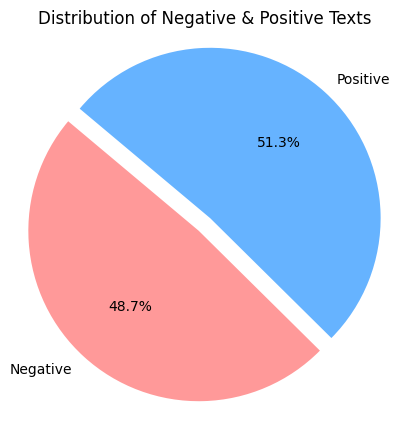

In [ ]:
# Count the number of Positive and Negative texts
neg_count = df['binary_class'].sum()
pos_count = len(df) - neg_count

print(f"Number of negative texts: {neg_count}")
print(f"Number of positive texts: {pos_count}")
print()

# Prepare data for the pie chart
labels = ['Negative', 'Positive']
sizes = [neg_count, pos_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Bullying)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Negative & Positive Texts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Apply TF-IDF vectorizer for feature selection**
*   Library for **TF-IDF** vectorizer.
*   Stands for Term Frequency-Inverse Document Frequency.
*   Measures how important a word is to a sentence in a collection of dataset.
*   Taking total **1000** features from the tokenized comment.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Join lemmatized tokens back into a single string for TF-IDF vectorization
df['tfidf_comment'] = df['Comment'].apply(lambda x: ' '.join(x))

# Apply TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['tfidf_comment'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print("TF-IDF DataFrame:")
tfidf_df.head(10)

TF-IDF DataFrame:


,pron,অক,অট,অড,অত,অতট,অধ,অন,অনন,অনল,...,য়ক,য়গ,য়ছ,য়জ,য়দ,য়ন,য়প,য়ম,য়৷,৷৷
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.341991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313690,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414673,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Another libraries for machine learning model training and result calculation.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# **Train - Test Split**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['binary_class'], test_size=0.3, random_state=42)

# **Applying Random Forest, KNN, SVM, LR model**

In [ ]:
# Apply Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Apply KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Apply SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Apply Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# **Calculation of Accuracy, Precision, Recall and F1-score**

In [ ]:
# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print evaluation metrics
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nKNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("\nLogistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Random Forest Metrics:
Accuracy: 0.76
Precision: 0.7600997150997151
Recall: 0.76
F1 Score: 0.7599146059420032

KNN Metrics:
Accuracy: 0.6
Precision: 0.6392903392903393
Recall: 0.6
F1 Score: 0.5658515326134328

SVM Metrics:
Accuracy: 0.8
Precision: 0.802880658436214
Recall: 0.8
F1 Score: 0.7996885428253616

Logistic Regression Metrics:
Accuracy: 0.78
Precision: 0.7865701357466063
Recall: 0.78
F1 Score: 0.7790285026093939


# **Libraries for LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# **Building LSTM Model & Printing Results**

In [ ]:
# Parameters for LSTM
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100

# Convert tokenized comments back to strings
tokenized_comments_str = df['Comment'].apply(lambda x: ' '.join(x))

# Tokenizing the text data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(tokenized_comments_str)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Converting text to sequences
X_lstm = tokenizer.texts_to_sequences(tokenized_comments_str)
X_lstm = pad_sequences(X_lstm, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_lstm.shape)

# Encoding labels
encoder = LabelEncoder()
y_lstm = encoder.fit_transform(df['binary_class'])
num_classes = len(np.unique(y_lstm))

# One-hot encoding of labels
y_lstm = np.zeros((len(y_lstm), num_classes))
for i, label in enumerate(df['binary_class']):
    y_lstm[i, encoder.transform([label])] = 1

print('Shape of label tensor:', y_lstm.shape)

# Split the dataset into training and testing sets for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

print(model.summary())

# Training the model
epochs = 10
batch_size = 64

history = model.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

# Evaluating the model
accuracy_lstm = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)[1]
print("Accuracy (LSTM):", accuracy_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm, verbose=0)

# Convert predictions and true labels from one-hot encoding to integer labels
y_test_lstm_int = np.argmax(y_test_lstm, axis=1)
y_pred_lstm_int = np.argmax(y_pred_lstm, axis=1)

# Classification report
report_lstm = classification_report(y_test_lstm_int, y_pred_lstm_int, output_dict=True)

# Printing recall, precision, and F1-score for each class
for class_name, metrics in report_lstm.items():
    if class_name == 'accuracy':
        continue
    print(f"\nClass: {class_name}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")

LSTM_Precision = precision_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
LSTM_Recall = recall_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
LSTM_F1Score = f1_score(y_test_lstm_int, y_pred_lstm_int, average='weighted')
# Overall metrics
print(f"\nOverall Precision (LSTM): {LSTM_Precision}")
print(f"Overall Recall (LSTM): {LSTM_Recall}")
print(f"Overall F1-Score (LSTM): {LSTM_F1Score}")

Found 2754 unique tokens.
Shape of data tensor: (1000, 20)
Shape of label tensor: (1000, 2)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 20, 100)           5000000   
                                                                 
 spatial_dropout1d_20 (Spat  (None, 20, 100)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_20 (LSTM)              (None, 100)               80400     
                                                                 
 dense_20 (Dense)            (None, 2)                 202       
                                                                 
Total params: 5080602 (19.38 MB)
Trainable params: 5080602 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________________

# **LSTM gives us better accuracy and result.**

# **Plotting all the result of different models.**

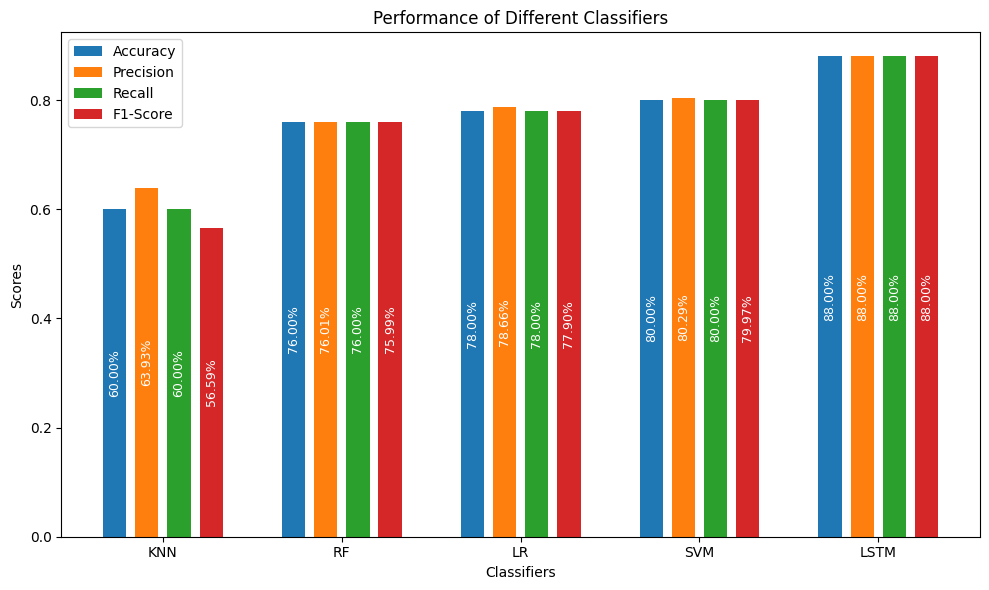

In [ ]:
# Data
classifiers = ['KNN', 'RF', 'LR', 'SVM', 'LSTM']
accuracy = [knn_accuracy, rf_accuracy, lr_accuracy, svm_accuracy, accuracy_lstm]
precision = [knn_precision, rf_precision, lr_precision, svm_precision, LSTM_Precision]
recall = [knn_recall, rf_recall, lr_recall, svm_recall, LSTM_Recall]
f1_score = [knn_f1, rf_f1, lr_f1, svm_f1, LSTM_F1Score]

# Plotting
bar_width = 0.13
gap = 0.05  # gap between different metrics
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

bars1 = plt.bar(index - 1.5 * (bar_width + gap), accuracy, bar_width, label='Accuracy')
bars2 = plt.bar(index - 0.5 * (bar_width + gap), precision, bar_width, label='Precision')
bars3 = plt.bar(index + 0.5 * (bar_width + gap), recall, bar_width, label='Recall')
bars4 = plt.bar(index + 1.5 * (bar_width + gap), f1_score, bar_width, label='F1-Score')

# Adding text for percentages inside the bars
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height:.2%}', ha='center', va='center', fontsize=9, color='white', rotation='vertical')

add_percentage_labels(bars1)
add_percentage_labels(bars2)
add_percentage_labels(bars3)
add_percentage_labels(bars4)

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance of Different Classifiers')
plt.xticks(index, classifiers)
plt.legend()

plt.tight_layout()
plt.show()